In [484]:
# importando las librerias 

#limpieza y transformacion de datos
import pandas as pd
import numpy as np
import janitor
import missingno

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

### Set de estilo de los graficos 

In [533]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (12, 9.4)

### Cargando los datos 

In [486]:
df = (
    pd.read_csv("/home/astin/Documents/MypythonBriefcase/visual/job_test/BI_analyst/data/raw/BIChallenge_Templaris - BusinessBIBA_Challenge.csv") 
)

### Conociendo los datos 

In [487]:
df.describe()


,Unnamed: 0,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
mean,6377.500000,2516.923330,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,3682.484352,1465.606943,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,0.000000,1.000000,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,3188.750000,1204.000000,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,6377.500000,2571.000000,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,9566.250000,3801.000000,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000
max,12755.000000,4999.000000,49.000000,108300.000000,49.000000,412498.523200,64000.000000,5.000000


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12756 non-null  int64  
 1   ID              12756 non-null  int64  
 2   UPDATE          12756 non-null  object 
 3   STATUS          7940 non-null   object 
 4   MOTIVE          2298 non-null   object 
 5   INTEREST_RATE   1505 non-null   float64
 6   AMOUNT          1505 non-null   float64
 7   CAT             1505 non-null   float64
 8   TXN             3773 non-null   float64
 9   CP              1046 non-null   float64
 10  DELIVERY_SCORE  1046 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.1+ MB


In [491]:
df.shape

(12756, 11)

### ELiminando la columa Unnamed

In [492]:
df.drop(columns='Unnamed: 0', inplace=True)


### Tenemos datos faltantes 

In [493]:
(
    df
    .isnull()
    .any()
)

ID                False
UPDATE            False
STATUS             True
MOTIVE             True
INTEREST_RATE      True
AMOUNT             True
CAT                True
TXN                True
CP                 True
DELIVERY_SCORE     True
dtype: bool

### Cuantos datos faltantes tenemos 

In [494]:
(
    df
    .isnull()
    .sum()
)

ID                    0
UPDATE                0
STATUS             4816
MOTIVE            10458
INTEREST_RATE     11251
AMOUNT            11251
CAT               11251
TXN                8983
CP                11710
DELIVERY_SCORE    11710
dtype: int64

In [495]:
(
    df
    .isnull()
    .sum()
    .sum()
)

81430

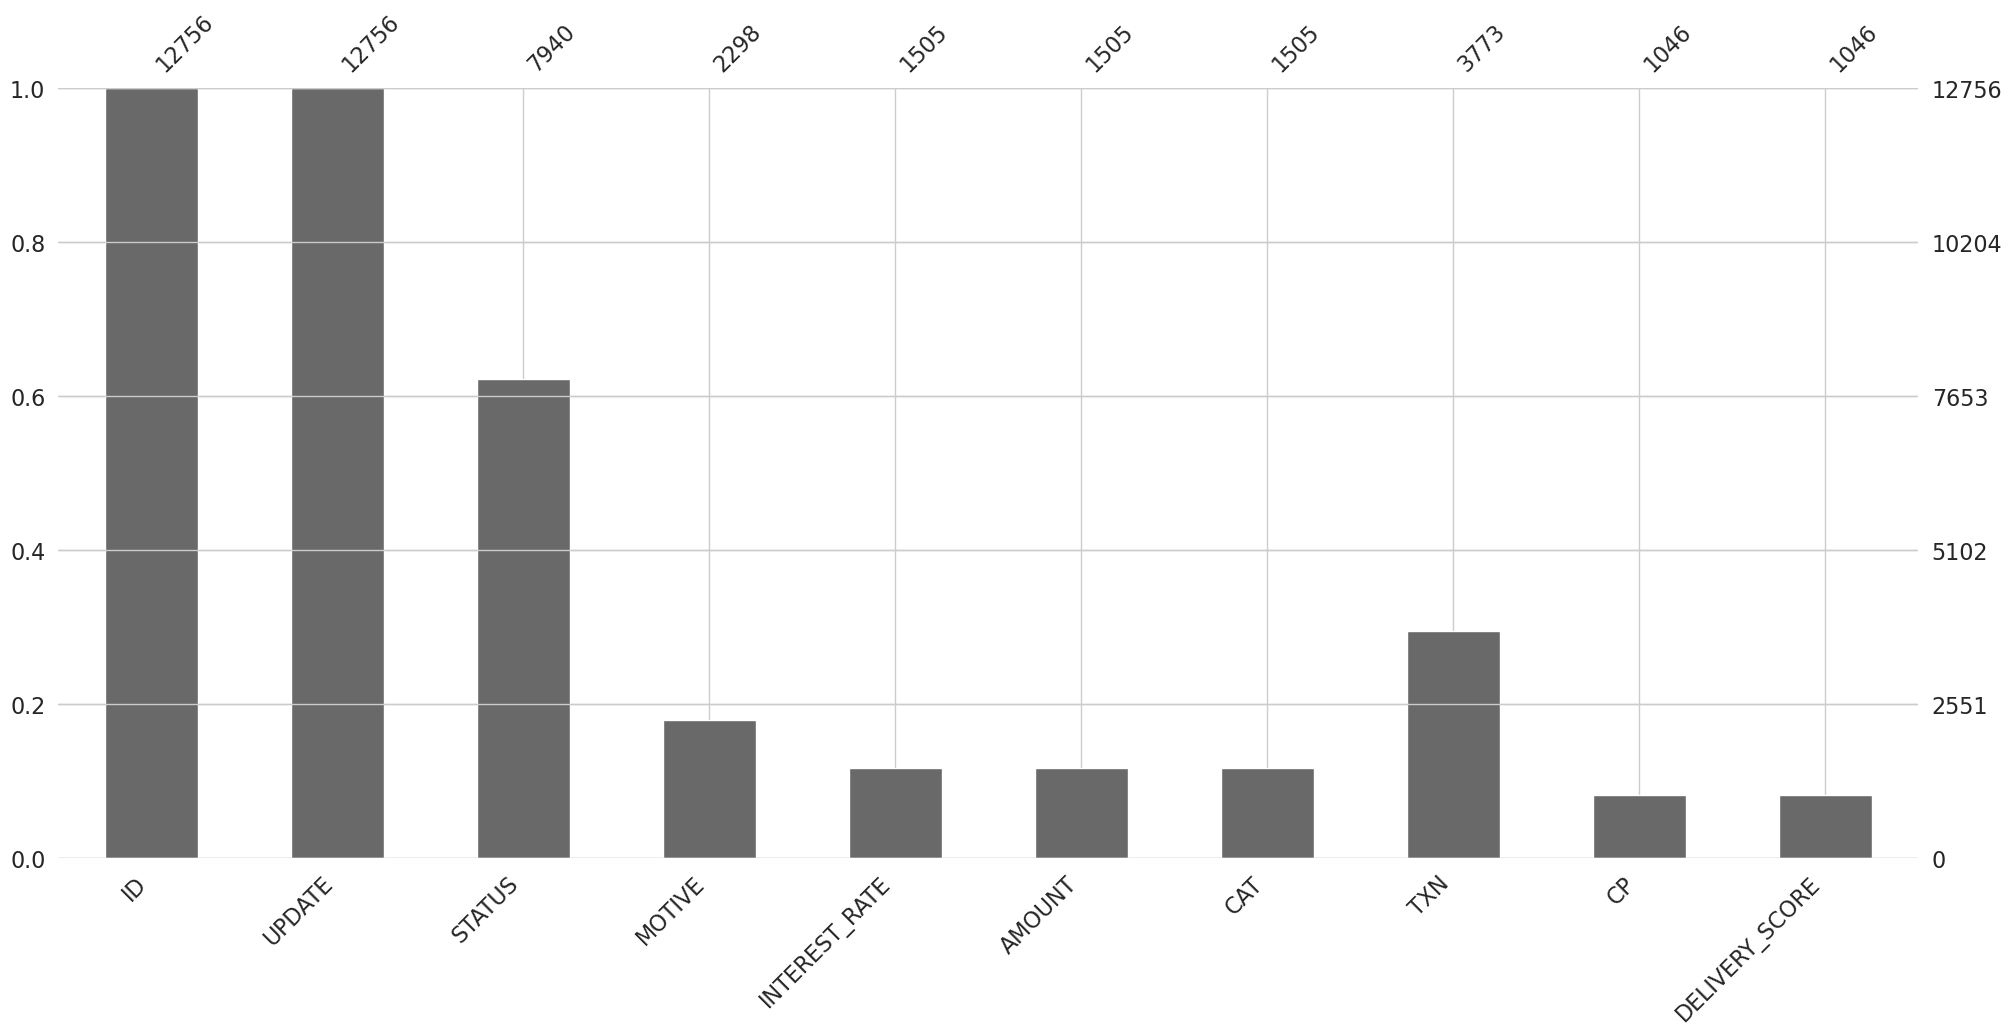

In [496]:
(
    missingno.bar(df=df)
);

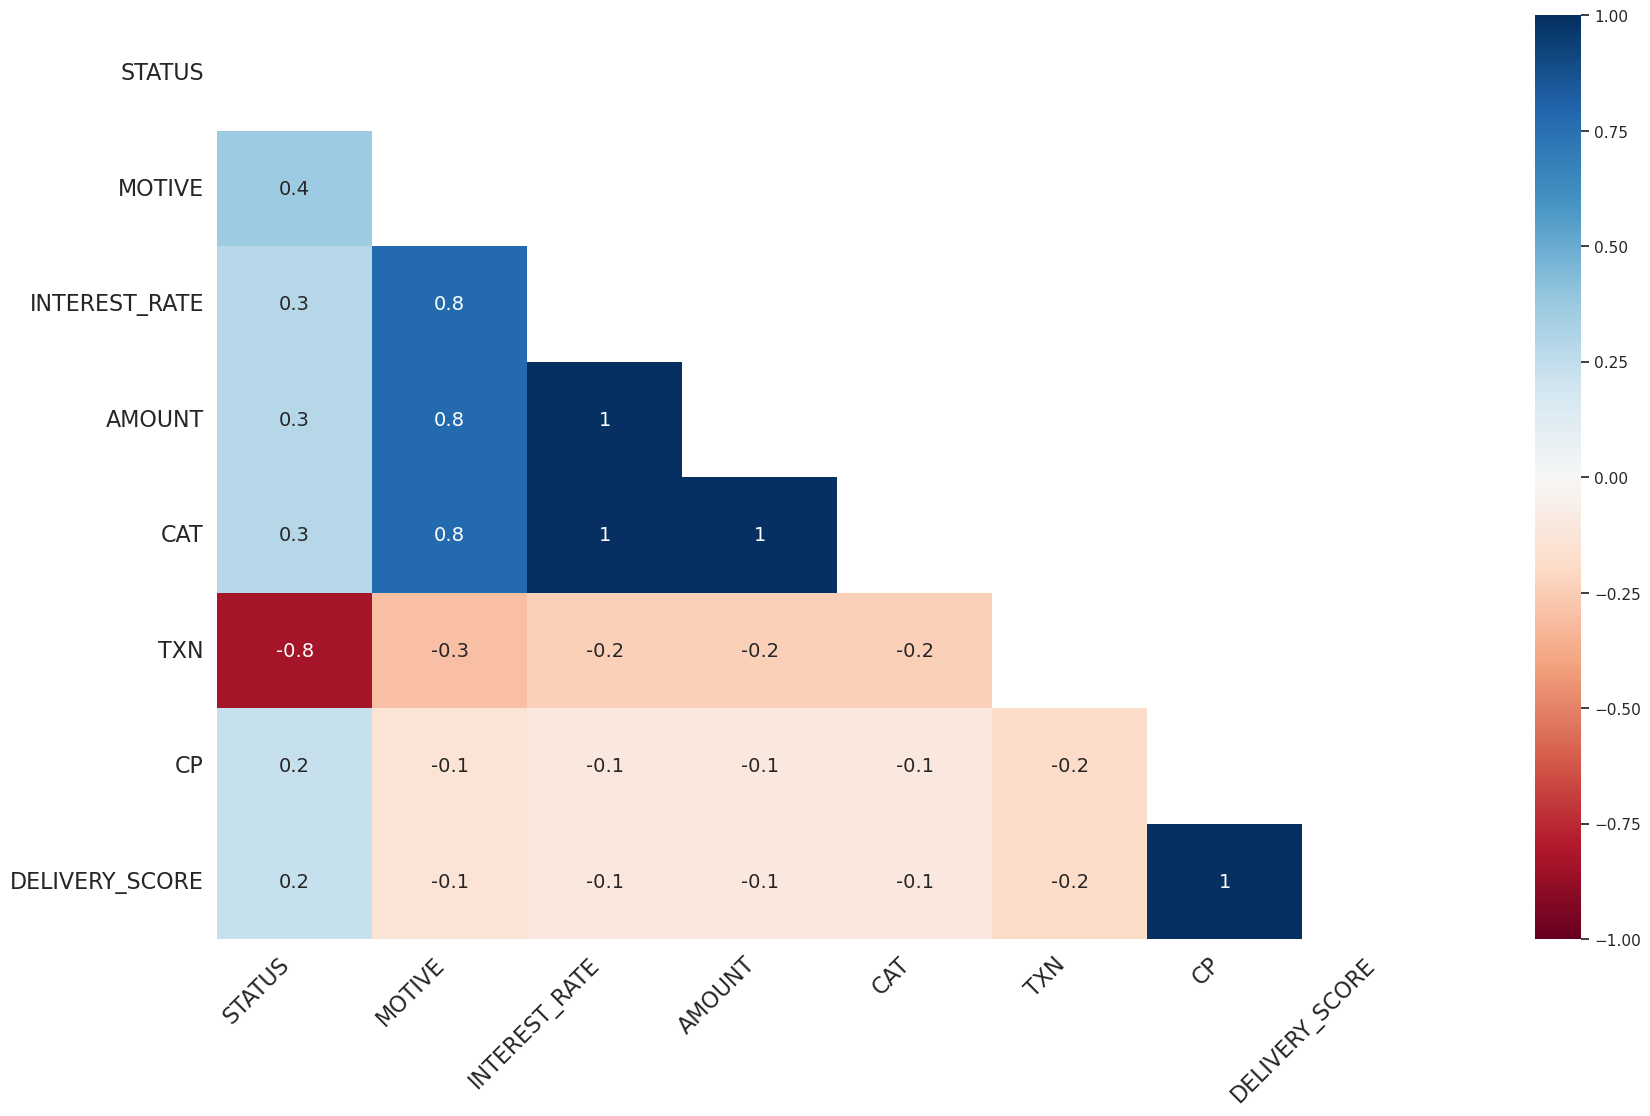

In [497]:
(
    missingno.heatmap(df=df)
);

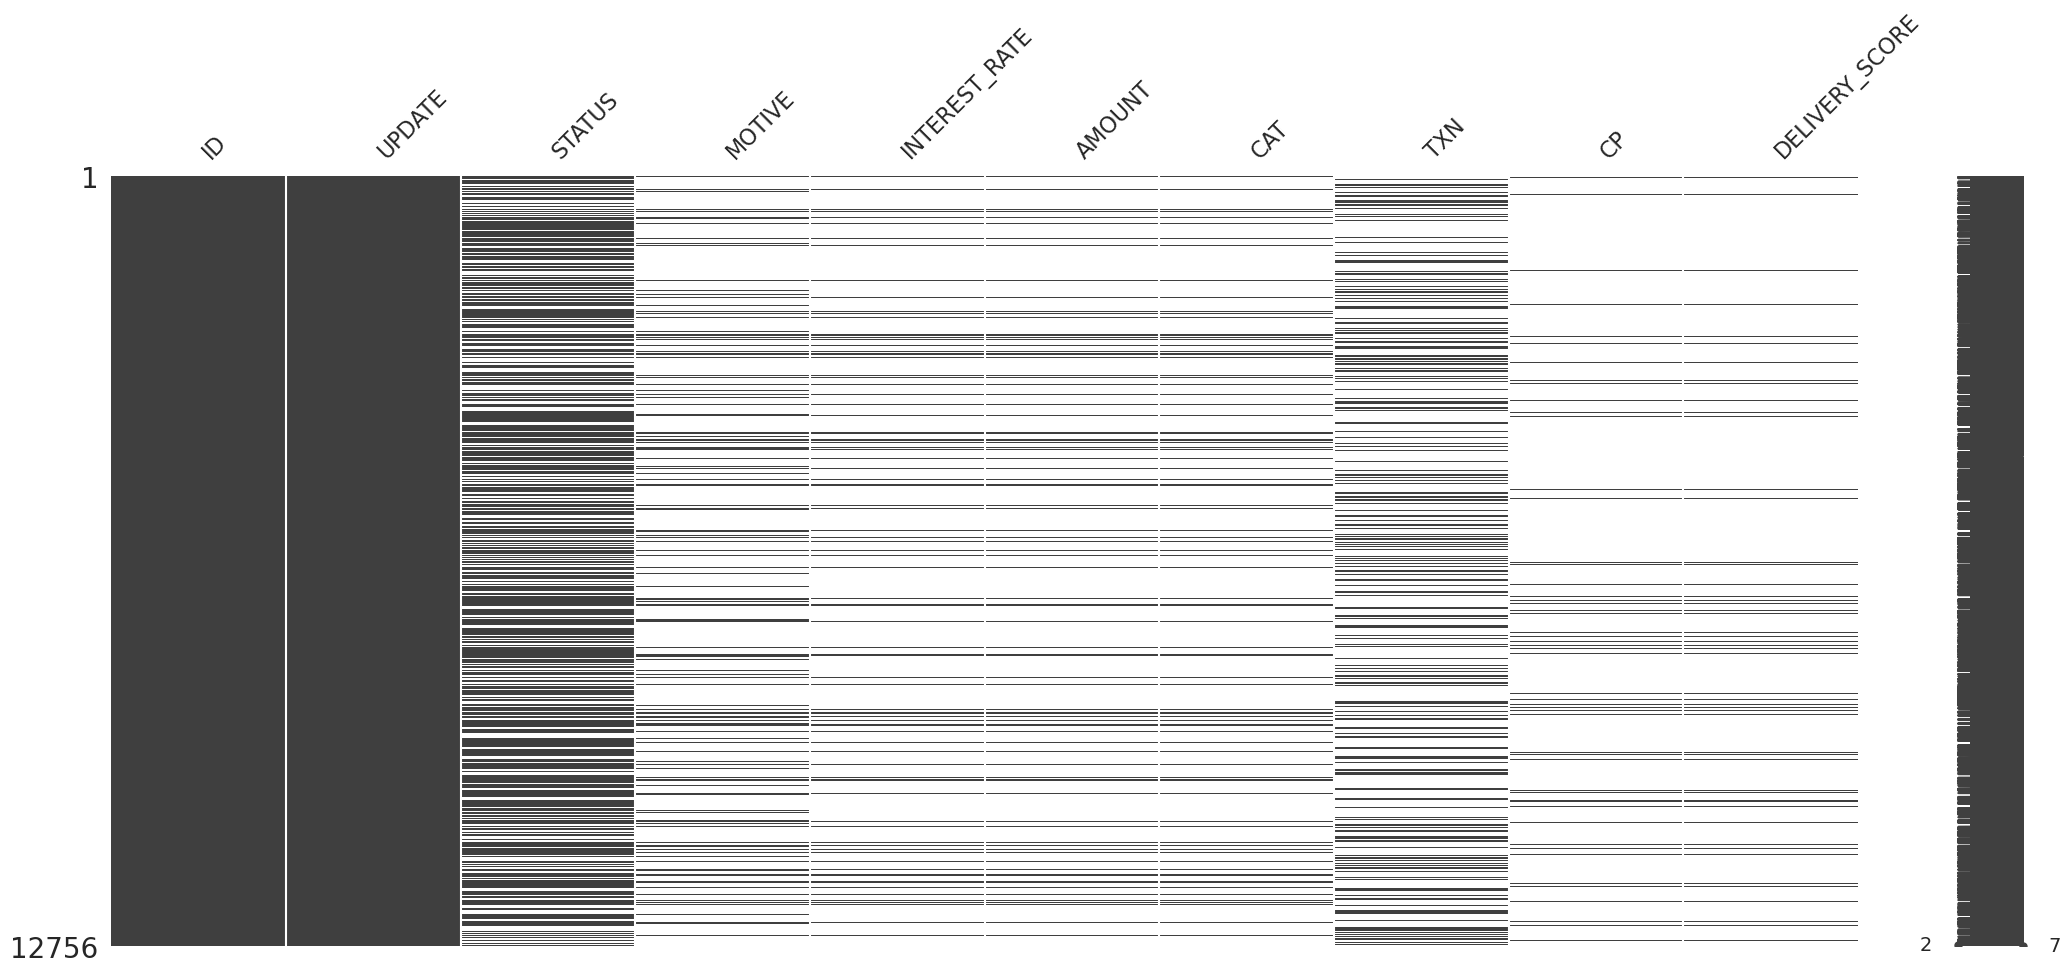

In [498]:
(
    missingno.matrix(df=df)
);

In [499]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Manejo de Datos faltantes implicitos y Explicitos 

In [500]:
for indice_fila, fila in df.iterrows():
    if pd.isna(fila['STATUS']) and pd.notna(fila['TXN']):
        df.at[indice_fila, 'STATUS'] = "TRANSACTION"

In [501]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,TRANSACTION,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
(
    df.STATUS.fillna('UNANSWERED',inplace=True)
)

In [503]:
(
    df.MOTIVE.fillna('DENIED',inplace=True)
)

In [504]:
(
    df.INTEREST_RATE.fillna(0,inplace=True)
)

In [505]:
(
    df.AMOUNT.fillna(0,inplace=True)
)

In [506]:
(
    df.CAT.fillna(0,inplace=True)
)

In [507]:
(
    df.TXN.fillna(0,inplace=True)
)

In [508]:
(
    df.CP.fillna(0,inplace=True)
)

In [509]:
(
    df.DELIVERY_SCORE.fillna(0,inplace=True)
)

### Verificando la limpieza de los datos faltantes 

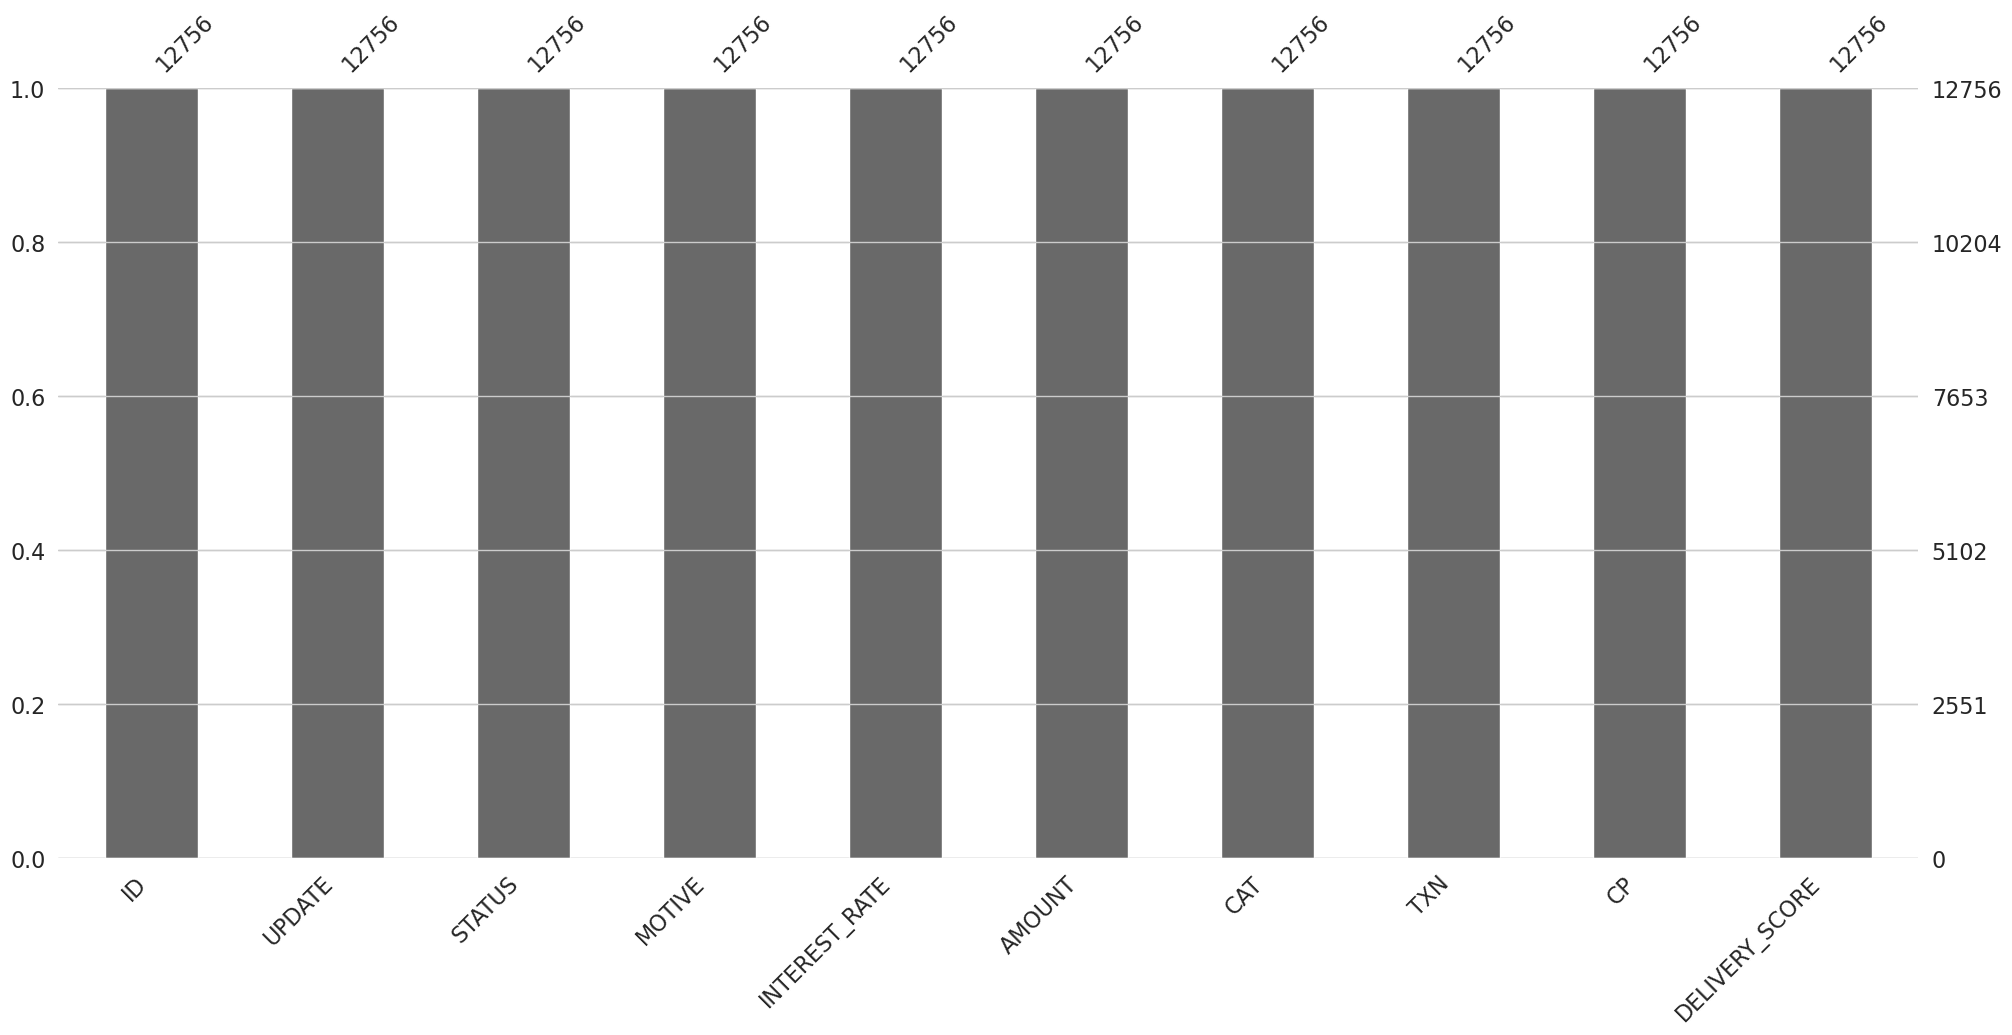

In [515]:
missingno.bar(df=df);

### Guardando al data en la carpeta correspondiente 

In [521]:
df.to_csv('/home/astin/Documents/MypythonBriefcase/visual/job_test/BI_analyst/data/processed/clean_data.csv', index= None)

### Cambiando el tipo de datos 

In [512]:
df['UPDATE'] = pd.to_timedelta(df['UPDATE'],errors='ignore')
# EL parametro errors permita elgir la forma en la cual manejamos los errores

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              12756 non-null  int64  
 1   UPDATE          12756 non-null  object 
 2   STATUS          12756 non-null  object 
 3   MOTIVE          12756 non-null  object 
 4   INTEREST_RATE   12756 non-null  float64
 5   AMOUNT          12756 non-null  float64
 6   CAT             12756 non-null  float64
 7   TXN             12756 non-null  float64
 8   CP              12756 non-null  float64
 9   DELIVERY_SCORE  12756 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 996.7+ KB


### Planteamito de la pregunta de negocio

#### Como optimizar el  embudo de conversión de negocios de tarjetas de crédito.

### Anlisis univarido EDA

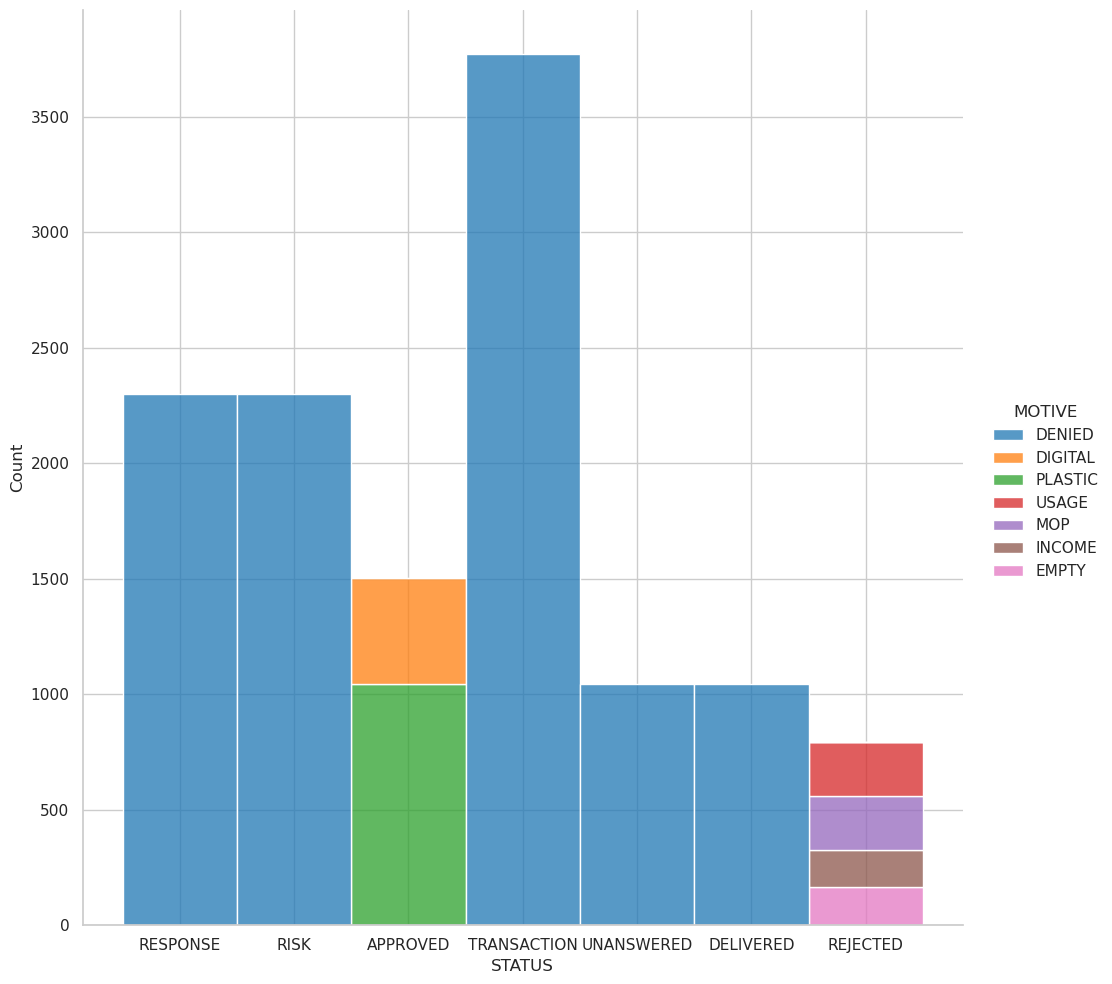

In [547]:
sns.displot(
    data= df,
    x= df.STATUS,
    height=10,
    hue= df.MOTIVE,
    multiple='stack'
    
);

*El proceso de funnel observando los datos de la columna status agrupados por motive, nos muestra que una muy gran cantidad de los datos huba un transaccion*
*de las mas de 2000 personas que respondieron al funnel el sistema de validadcion solo aprobo alrededor de una 1500 personas. Para optimizar los procesos de marketing para que mas usuarios respondan a la comapaña ya que alrededor de un 1/3 de no la respondio. Necesitamos un target mas especifico*

In [1039]:
q0_amount = df.AMOUNT[df.AMOUNT>1].quantile(0)-1
q50_amount = df.AMOUNT[df.AMOUNT>1].quantile(0.50)
q75_amount = df.AMOUNT[df.AMOUNT>1].quantile(0.75)
q1_amount = df.AMOUNT[df.AMOUNT>1].quantile(1)+1
amount_column = df[df.AMOUNT>1]
# amount_column


In [1042]:
amount_column['AMOUNT_CATEGORIAS'] = pd.cut(
    amount_column['AMOUNT'],bins=[
q0_amount,
q50_amount,
q75_amount,
q1_amount],
labels=['C','B','A']
    )

/tmp/ipykernel_72759/3777493672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_column['AMOUNT_CATEGORIAS'] = pd.cut(


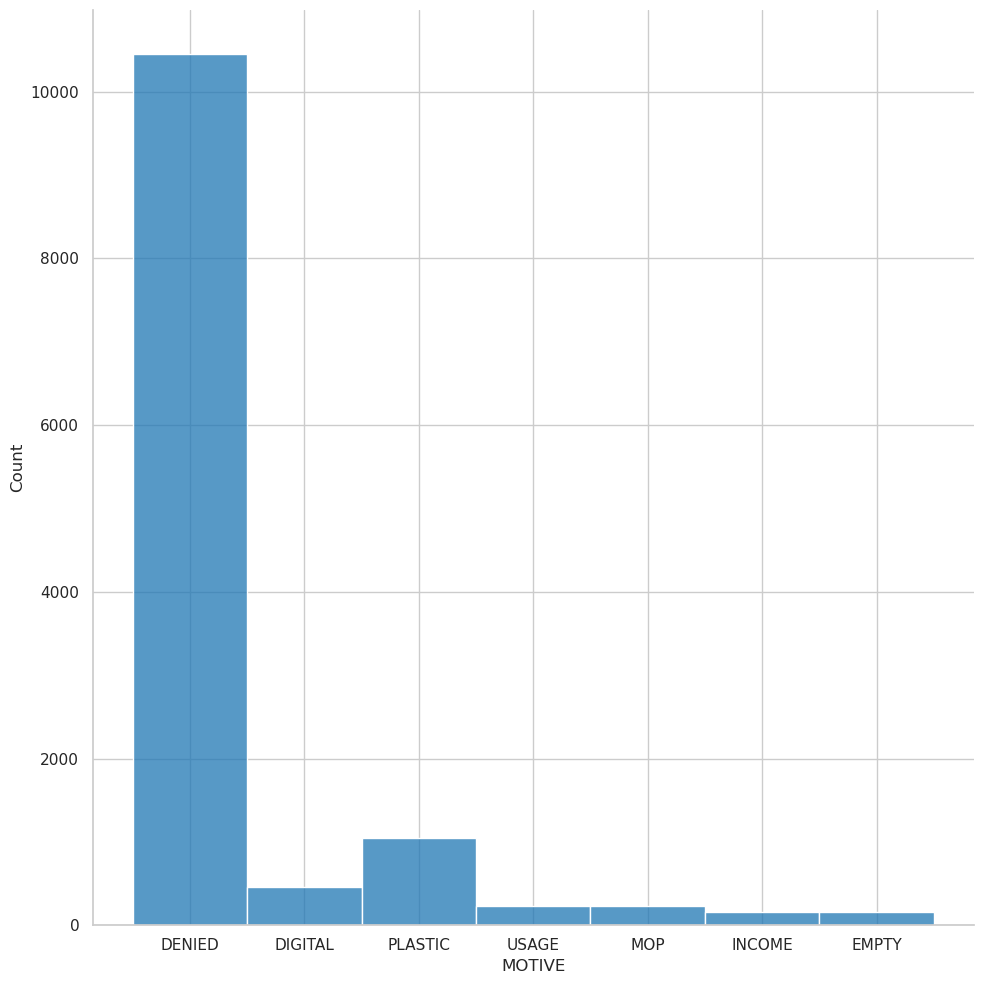

In [1046]:
sns.displot(
    data= df,
    x= 'MOTIVE',
    height=10,
    # hue= 'AMOUNT_CATEGORIAS',
    multiple='stack'
    
);

*Cantidad de personas rechazadas por el sistema de validacion*

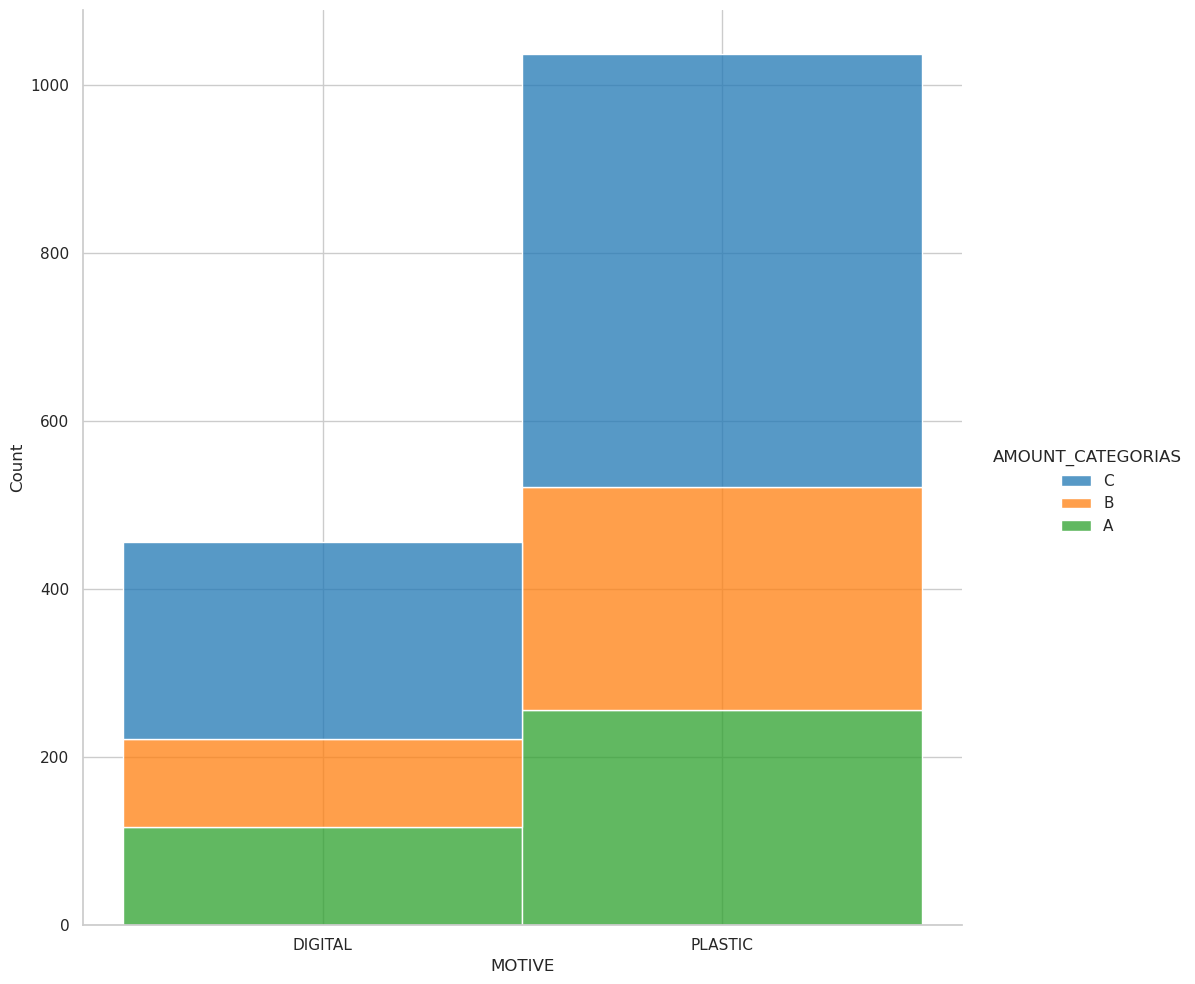

In [1043]:
sns.displot(
    data= amount_column,
    x= 'MOTIVE',
    height=10,
    hue= 'AMOUNT_CATEGORIAS',
    multiple='stack'
    
);

*Dentro de los motivos agrupados por las categorias:*
*Las Digitales estan aumentado en proporcion a las fisicas(plasticas) aumentar la cantidad de digitales puede reducir costo de entrega y materiales para las mismas*
*Ademas tenemos una gran cantidad de personas con productos de unos montos no tan grandes que pudiera interesar una digital como vemos en la columna digital segmento C*

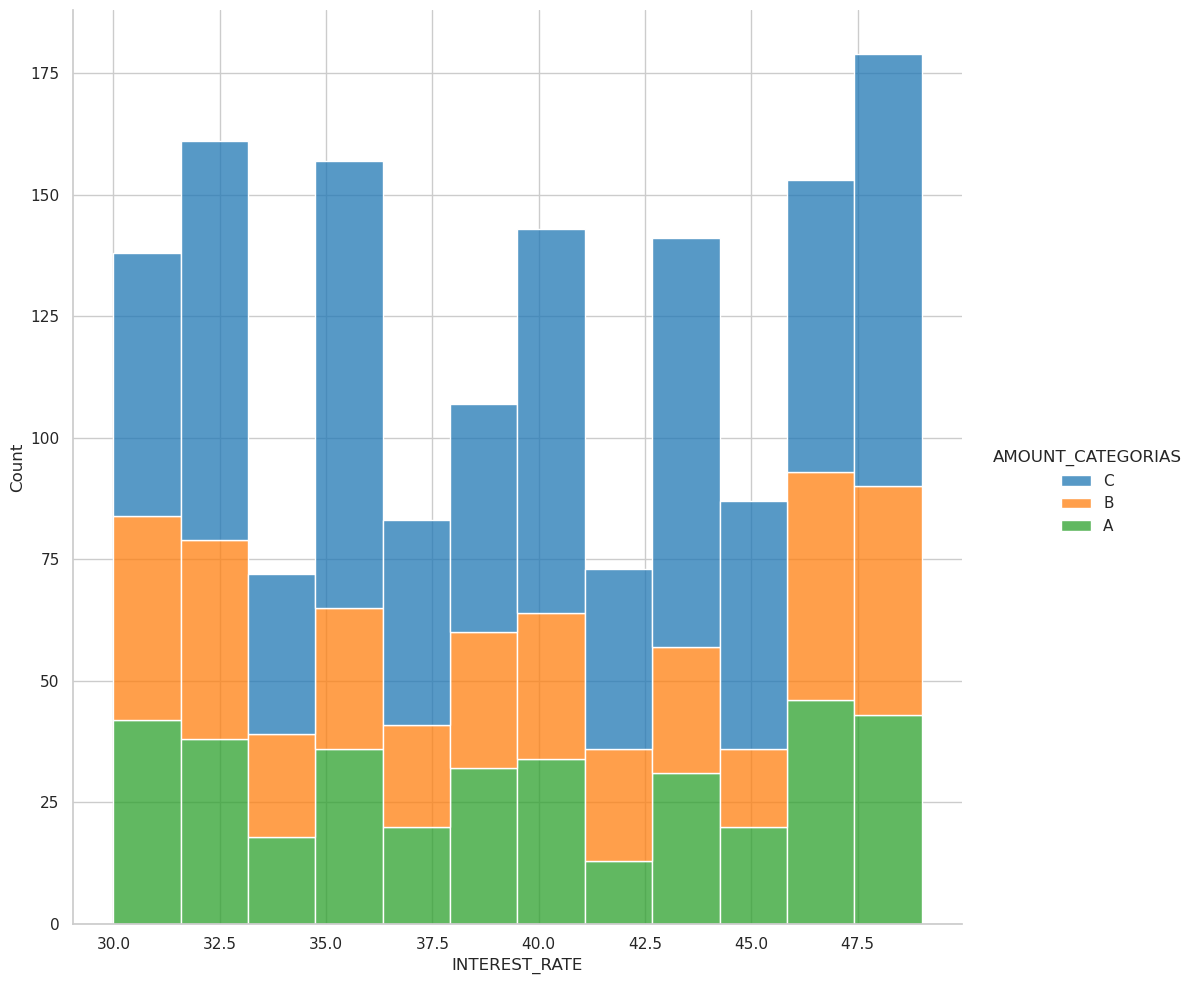

In [1047]:
sns.displot(
    data= amount_column,
    x= 'INTEREST_RATE',
    height=10,
    hue= 'AMOUNT_CATEGORIAS',
    multiple='stack'
    
);

*Tenemos una gran cantidad de productos de la categoria* **A** *que puede ser interesante pontencias mas ese segmento ya que aportan una gran cantidad de beneficios aun siendo mucho menores en numero a los otros segmentos*

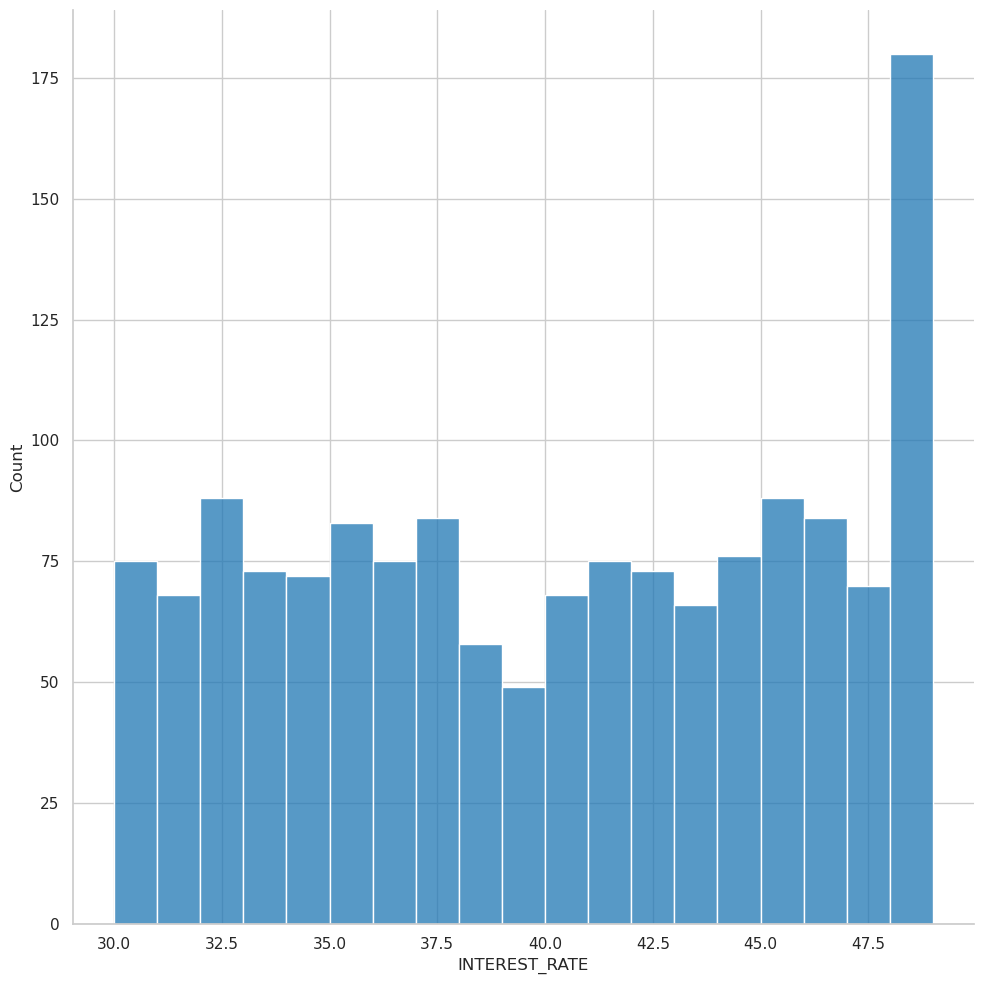

In [942]:
interest_x =df.loc[df["INTEREST_RATE"]>1]
interest_x = pd.Series(interest_x.INTEREST_RATE)

sns.displot(
    data= interest_x,
    x=interest_x,
    height=10,
    multiple='stack',
    binwidth=1,
    
    
    
);

In [1117]:
interest_x.max()

49.0

*Distribucion de los intereses de los  productos: tenemos un pico en los **49%** es de las tarjetas con montos mas pequeños*


### Medidas de tendencia central 


In [967]:
def medidas_dispercion(dato, nombre):
    promedio = dato.mean()
    media = dato.median()
    moda = dato.mode()
    std= dato.std()
    minimo = dato.min()
    maximo = dato.max()
    cuartile_25 = dato.quantile(0.25)
    cuartile_75 = dato.quantile(0.75)
    iqr= interest_cuartile_75 - interest_cuartile_25

    print(
    f'{nombre}_promedio: ',    promedio,
    f'{nombre}_media: ',       media,
    f'{nombre}_moda: ' ,       moda,
    f'{nombre}_std: ' ,        std,
    f'{nombre}_minimo: ' ,     minimo,
    f'{nombre}_maximo: ',      maximo,
    f'{nombre}_cuartile_25: ', cuartile_25,
    f'{nombre}_cuartile_75: ', cuartile_75,
    f'{nombre}_iqr: ',         iqr,sep='\n')

medidas_dispercion(interest_x,'INTEREST_RATE')


INTEREST_RATE_promedio: 
39.695681063122926
INTEREST_RATE_media: 
40.0
INTEREST_RATE_moda: 
0    48.0
Name: INTEREST_RATE, dtype: float64
INTEREST_RATE_std: 
5.924762200481474
INTEREST_RATE_minimo: 
30.0
INTEREST_RATE_maximo: 
49.0
INTEREST_RATE_cuartile_25: 
35.0
INTEREST_RATE_cuartile_75: 
45.0
INTEREST_RATE_iqr: 
10.0


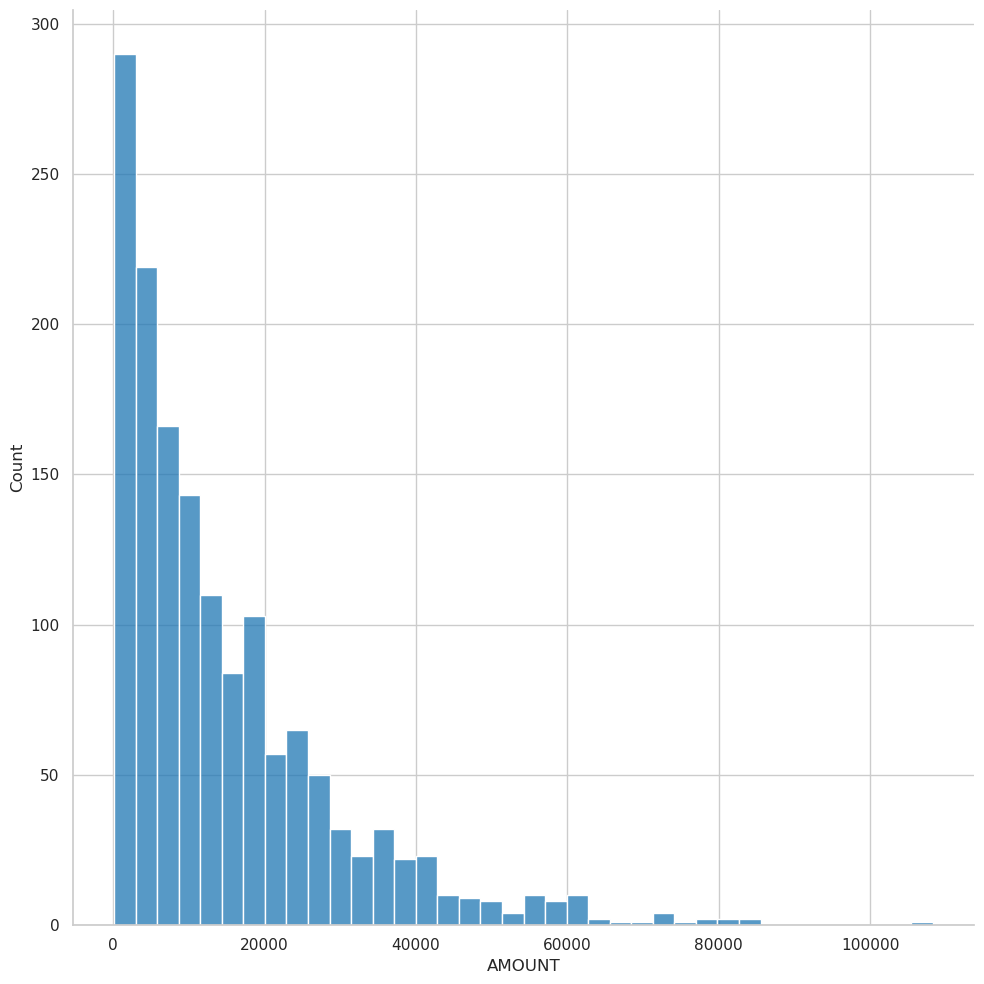

In [1113]:

amount_x =df.loc[df["AMOUNT"]>1]
# amount_x = pd.Series(amount_x)

sns.displot(
    data= amount_x,
    x=amount_x.AMOUNT,
    height=10,
    multiple='stack'
    # binwidth=1
    
    
);

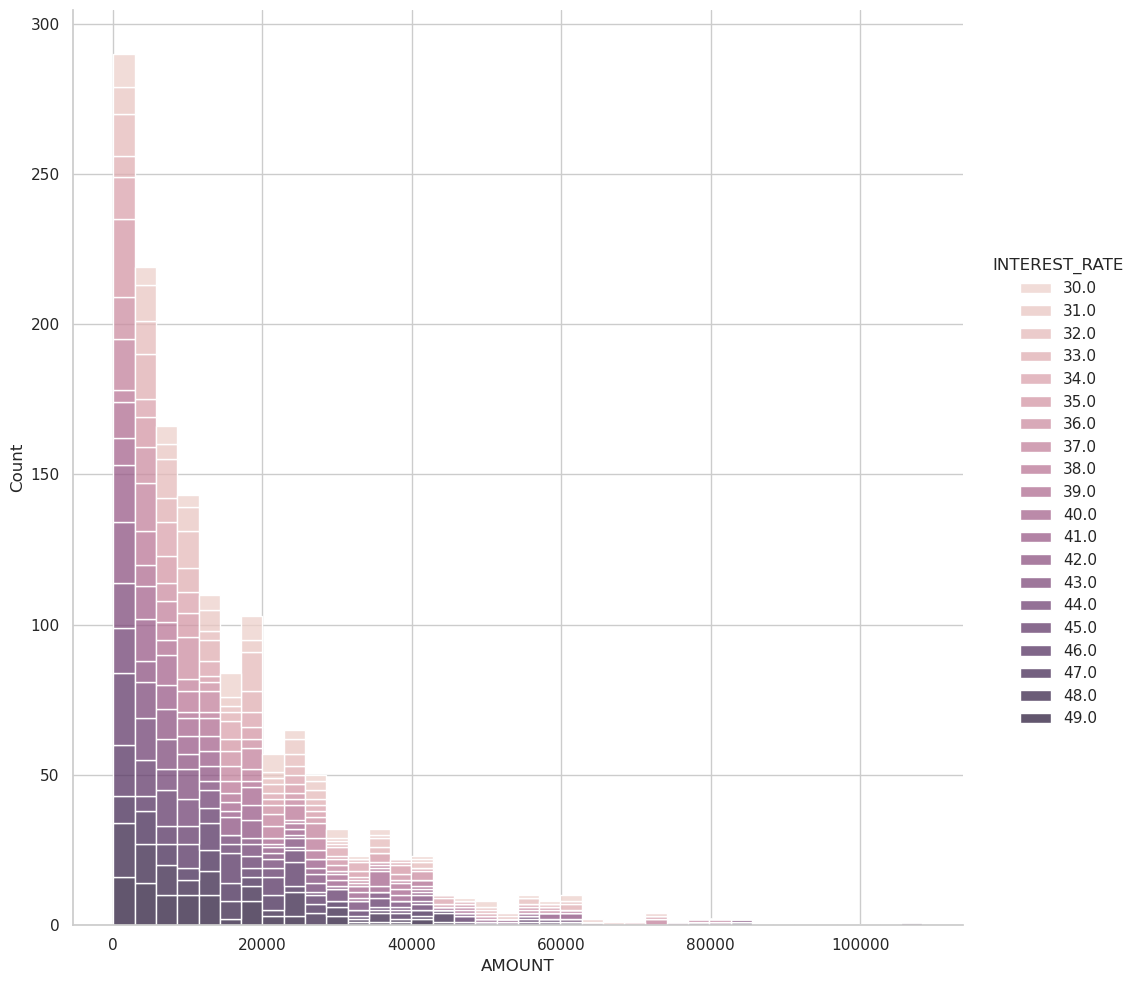

In [1116]:
sns.displot(
    data= amount_x,
    x=amount_x.AMOUNT,
    height=10,
    multiple='stack',
    hue= 'INTEREST_RATE'
    # binwidth=1
)

*Como decia las tarjetas con los montos mas pequeños son las que contiene interese mas altos*

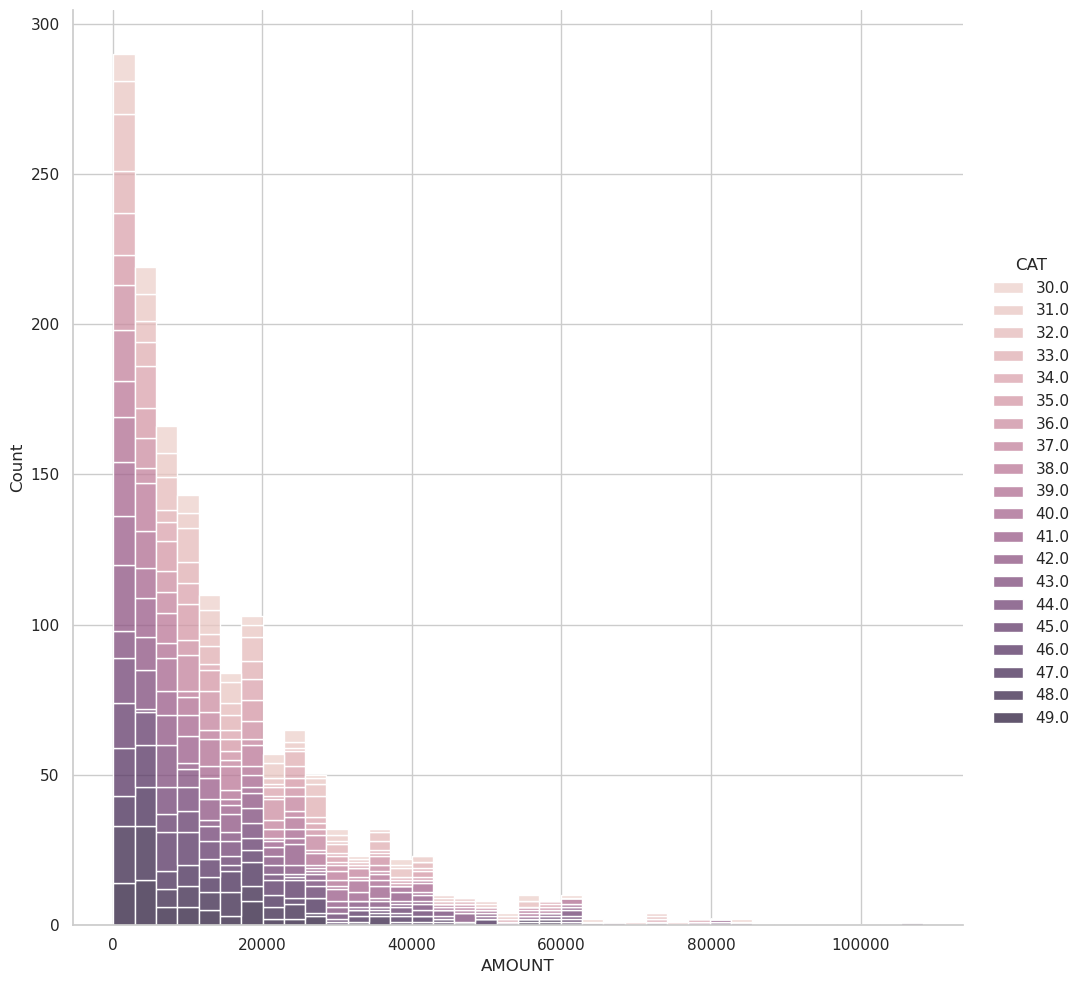

In [1118]:
sns.displot(
    data= amount_x,
    x=amount_x.AMOUNT,
    height=10,
    multiple='stack',
    hue= 'CAT'
    # binwidth=1
)

*Tambien pasa los mismo con el costo anual del crédito tienen unos intereses mas altos eso conectado con mas tarjesta digitales puede presentar en grandes beneficios*

#### Medidas de dispersion 


In [962]:

medidas_dispercion(amount_x,'amount')

amount_promedio: 
14586.412315930389
amount_media: 
9900.0
amount_moda: 
0    2000.0
Name: AMOUNT, dtype: float64
amount_std: 
14520.1689917359
amount_minimo: 
100.0
amount_maximo: 
108300.0
amount_cuartile_25: 
3900.0
amount_cuartile_75: 
20200.0
amount_iqr: 
10.0


### Distribucion del CAT

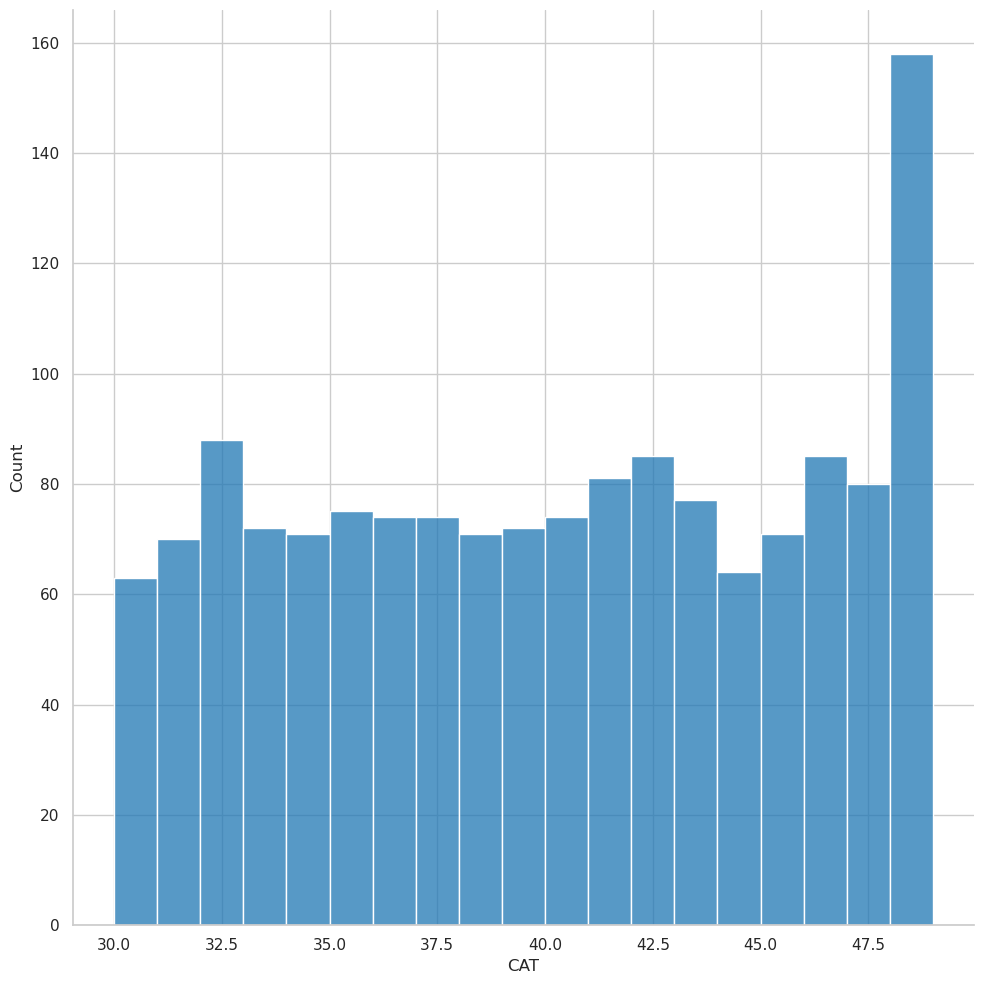

In [948]:
loc_x =df.loc[df["CAT"]>1]
loc_x = pd.Series(loc_x.CAT)

sns.displot(
    data= loc_x,
    x=loc_x,
    height=10,
    multiple='stack',
    binwidth=1
    
    
);

### Medidas de dispersion 

In [964]:

medidas_dispercion(loc_x,'LOC')

LOC_promedio: 
39.66378737541528
LOC_media: 
40.0
LOC_moda: 
0    48.0
Name: CAT, dtype: float64
LOC_std: 
5.751842698027001
LOC_minimo: 
30.0
LOC_maximo: 
49.0
LOC_cuartile_25: 
35.0
LOC_cuartile_75: 
45.0
LOC_iqr: 
10.0


In [1071]:
df_txn_sin_0= df[df['TXN']>1]
df_txn_sin_0.quantile(0.99)

ID                 4941.000000
INTEREST_RATE         0.000000
AMOUNT                0.000000
CAT                   0.000000
TXN               27845.769519
CP                    0.000000
DELIVERY_SCORE        0.000000
Name: 0.99, dtype: float64

In [1072]:
q1 = df_txn_sin_0['TXN'].quantile(0.25)
q3 = df_txn_sin_0['TXN'].quantile(0.75)

IQR = q3 - q1

txn_lower = q1 - 1.5*IQR
txn_upper = q3 + 1.5*IQR

df_txn_sin_outliers = df.loc[(df['TXN'] >= txn_lower) & (df['TXN'] <= txn_upper)]

df_txn_sin_outliers= df_txn_sin_outliers[df_txn_sin_outliers.TXN >1]

In [1073]:
df_txn_sin_outliers

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
3,1,08:23.4,TRANSACTION,DENIED,0.0,0.0,0.0,434.112066,0.0,0.0
10,4,25:47.0,TRANSACTION,DENIED,0.0,0.0,0.0,360.504173,0.0,0.0
11,4,22:22.1,TRANSACTION,DENIED,0.0,0.0,0.0,175.061765,0.0,0.0
13,4,53:04.3,TRANSACTION,DENIED,0.0,0.0,0.0,1171.027491,0.0,0.0
30,11,42:49.0,TRANSACTION,DENIED,0.0,0.0,0.0,2201.975645,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12746,4998,58:12.9,TRANSACTION,DENIED,0.0,0.0,0.0,13.882239,0.0,0.0
12751,4999,07:42.2,TRANSACTION,DENIED,0.0,0.0,0.0,31.104808,0.0,0.0
12752,4999,40:29.5,TRANSACTION,DENIED,0.0,0.0,0.0,74.732791,0.0,0.0
12754,4999,27:19.8,TRANSACTION,DENIED,0.0,0.0,0.0,79.866598,0.0,0.0


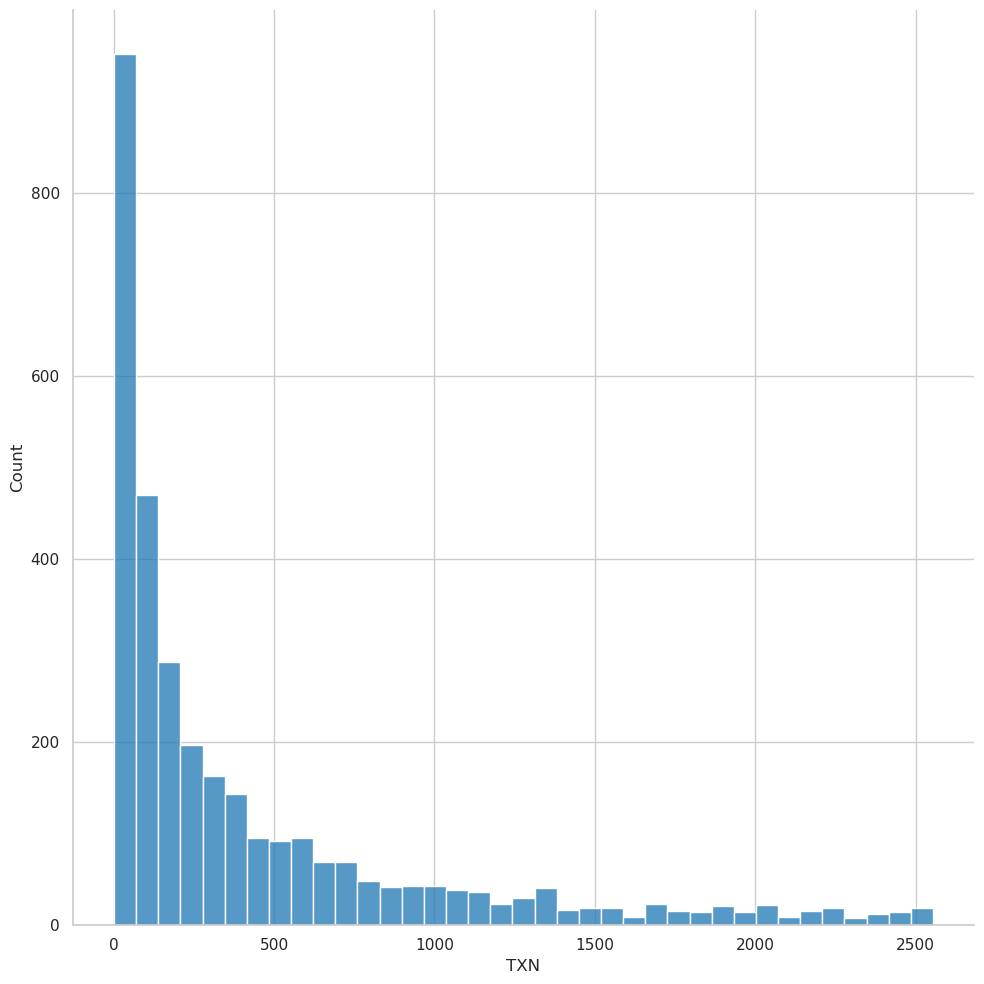

In [1074]:
sns.displot(
    data= df_txn_sin_outliers,
    x='TXN',
    height=10,
    # multiple='stack',
    # binwidth=10000
    
    
);

### Medidas de dispersion 

In [1066]:

medidas_dispercion(df_txn_sin_0.TXN,'TXN')

TXN_promedio: 
2014.04323170869
TXN_media: 
265.5477766
TXN_moda: 
0            1.027479
1            1.086674
2            1.172778
3            1.238863
4            1.334952
            ...      
3760    112623.193300
3761    123253.598500
3762    151564.447800
3763    169749.438000
3764    412498.523200
Name: TXN, Length: 3765, dtype: float64
TXN_std: 
10045.167300332516
TXN_minimo: 
1.027478791
TXN_maximo: 
412498.5232
TXN_cuartile_25: 
68.4210248
TXN_cuartile_75: 
1064.390556
TXN_iqr: 
10.0


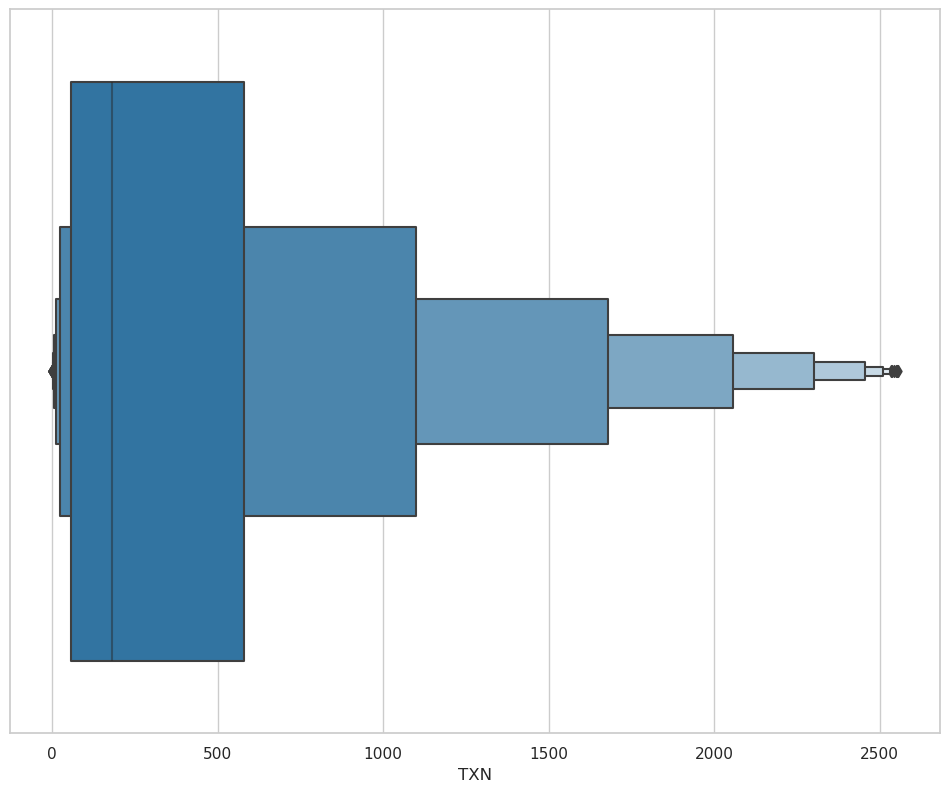

In [1075]:
sns.boxenplot(
    data=df_txn_sin_outliers,
    x='TXN'
);

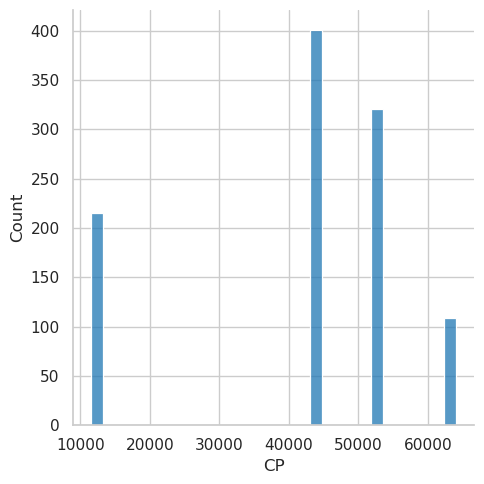

In [863]:
sns.displot(
    data= df[df['CP']>1]['CP'],
    x=df[df['CP']>1]['CP']
);

<AxesSubplot:xlabel='CP'>

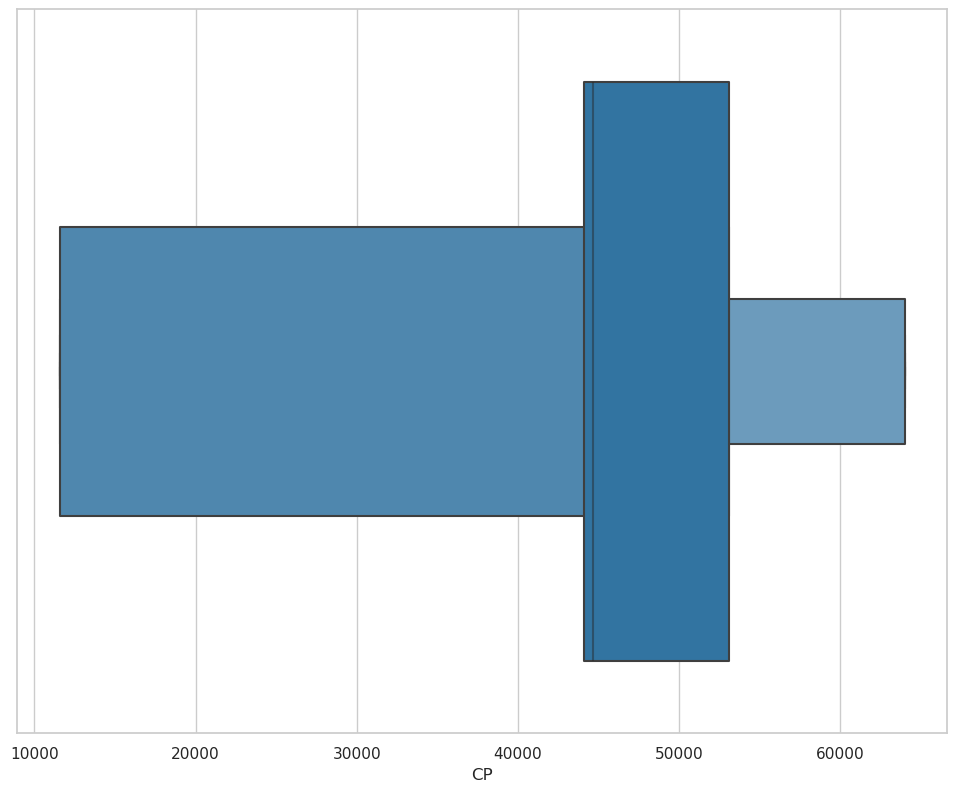

In [861]:
sns.boxenplot(
    data= df[df['CP']>1]['CP'],
    x=df[df['CP']>1]['CP']
)

### mediadas de dispersion 

In [965]:
medidas_dispercion(df[df['CP']>1]['CP'],"CP")

CP_promedio: 
42298.432122370934
CP_media: 
44620.0
CP_moda: 
0    53100.0
Name: CP, dtype: float64
CP_std: 
16757.54742845505
CP_minimo: 
11560.0
CP_maximo: 
64000.0
CP_cuartile_25: 
44100.0
CP_cuartile_75: 
53100.0
CP_iqr: 
10.0


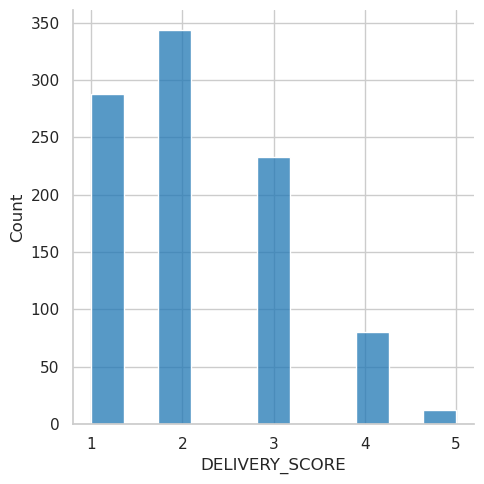

In [1083]:
delivery_df = df[df['DELIVERY_SCORE']>=1]
sns.displot(
    data =delivery_df,
    x= delivery_df['DELIVERY_SCORE']
);

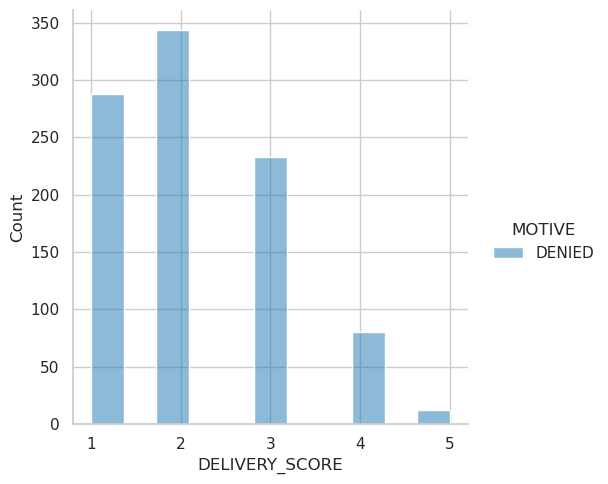

In [1087]:
sns.displot(
    data =delivery_df,
    x= delivery_df['DELIVERY_SCORE'],
    hue='MOTIVE'
);

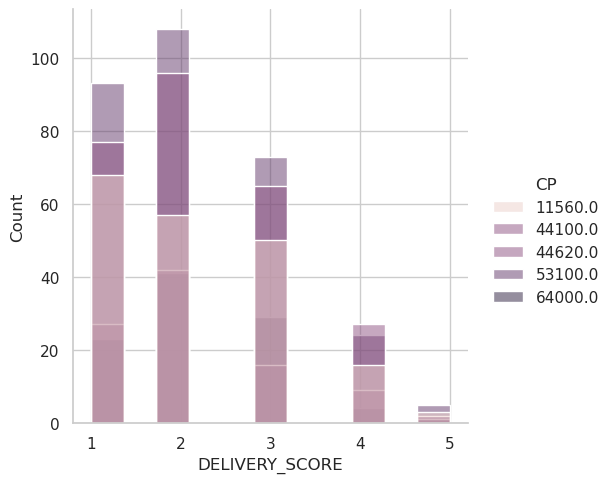

In [1092]:
sns.displot(
    data =delivery_df,
    x= delivery_df['DELIVERY_SCORE'],
    hue='CP'
);

In [1095]:
delivery_df

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
9,4,00:52.7,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,3.0
24,8,04:53.4,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,2.0
39,14,17:29.5,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,4.0
46,16,37:41.8,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,2.0
50,17,23:58.8,DELIVERED,DENIED,0.0,0.0,0.0,0.0,44620.0,3.0
...,...,...,...,...,...,...,...,...,...,...
12664,4957,47:19.9,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,1.0
12674,4962,30:30.1,DELIVERED,DENIED,0.0,0.0,0.0,0.0,11560.0,1.0
12685,4966,21:18.4,DELIVERED,DENIED,0.0,0.0,0.0,0.0,44100.0,3.0
12730,4991,00:37.6,DELIVERED,DENIED,0.0,0.0,0.0,0.0,44100.0,3.0


In [1094]:

delivery_df.CP.value_counts()

53100.0    303
44100.0    267
11560.0    194
64000.0     98
44620.0     95
Name: CP, dtype: int64

#### Record de entrega agrupado por el CP
*Esto nos muestra que las entregas solo se hace a 5 direcciones que son:*
- 53100.0    303
- 44100.0    267
- 11560.0    194
- 64000.0     98
- 44620.0     95


### mediadas de dispersion 

In [966]:
medidas_dispercion(df[df['DELIVERY_SCORE']>=1]['DELIVERY_SCORE'],'DELIVERY_SCORE')

DELIVERY_SCORE_promedio: 
2.147335423197492
DELIVERY_SCORE_media: 
2.0
DELIVERY_SCORE_moda: 
0    2.0
Name: DELIVERY_SCORE, dtype: float64
DELIVERY_SCORE_std: 
0.9853666274598778
DELIVERY_SCORE_minimo: 
1.0
DELIVERY_SCORE_maximo: 
5.0
DELIVERY_SCORE_cuartile_25: 
1.0
DELIVERY_SCORE_cuartile_75: 
3.0
DELIVERY_SCORE_iqr: 
10.0


### Analisis de 2 variables  

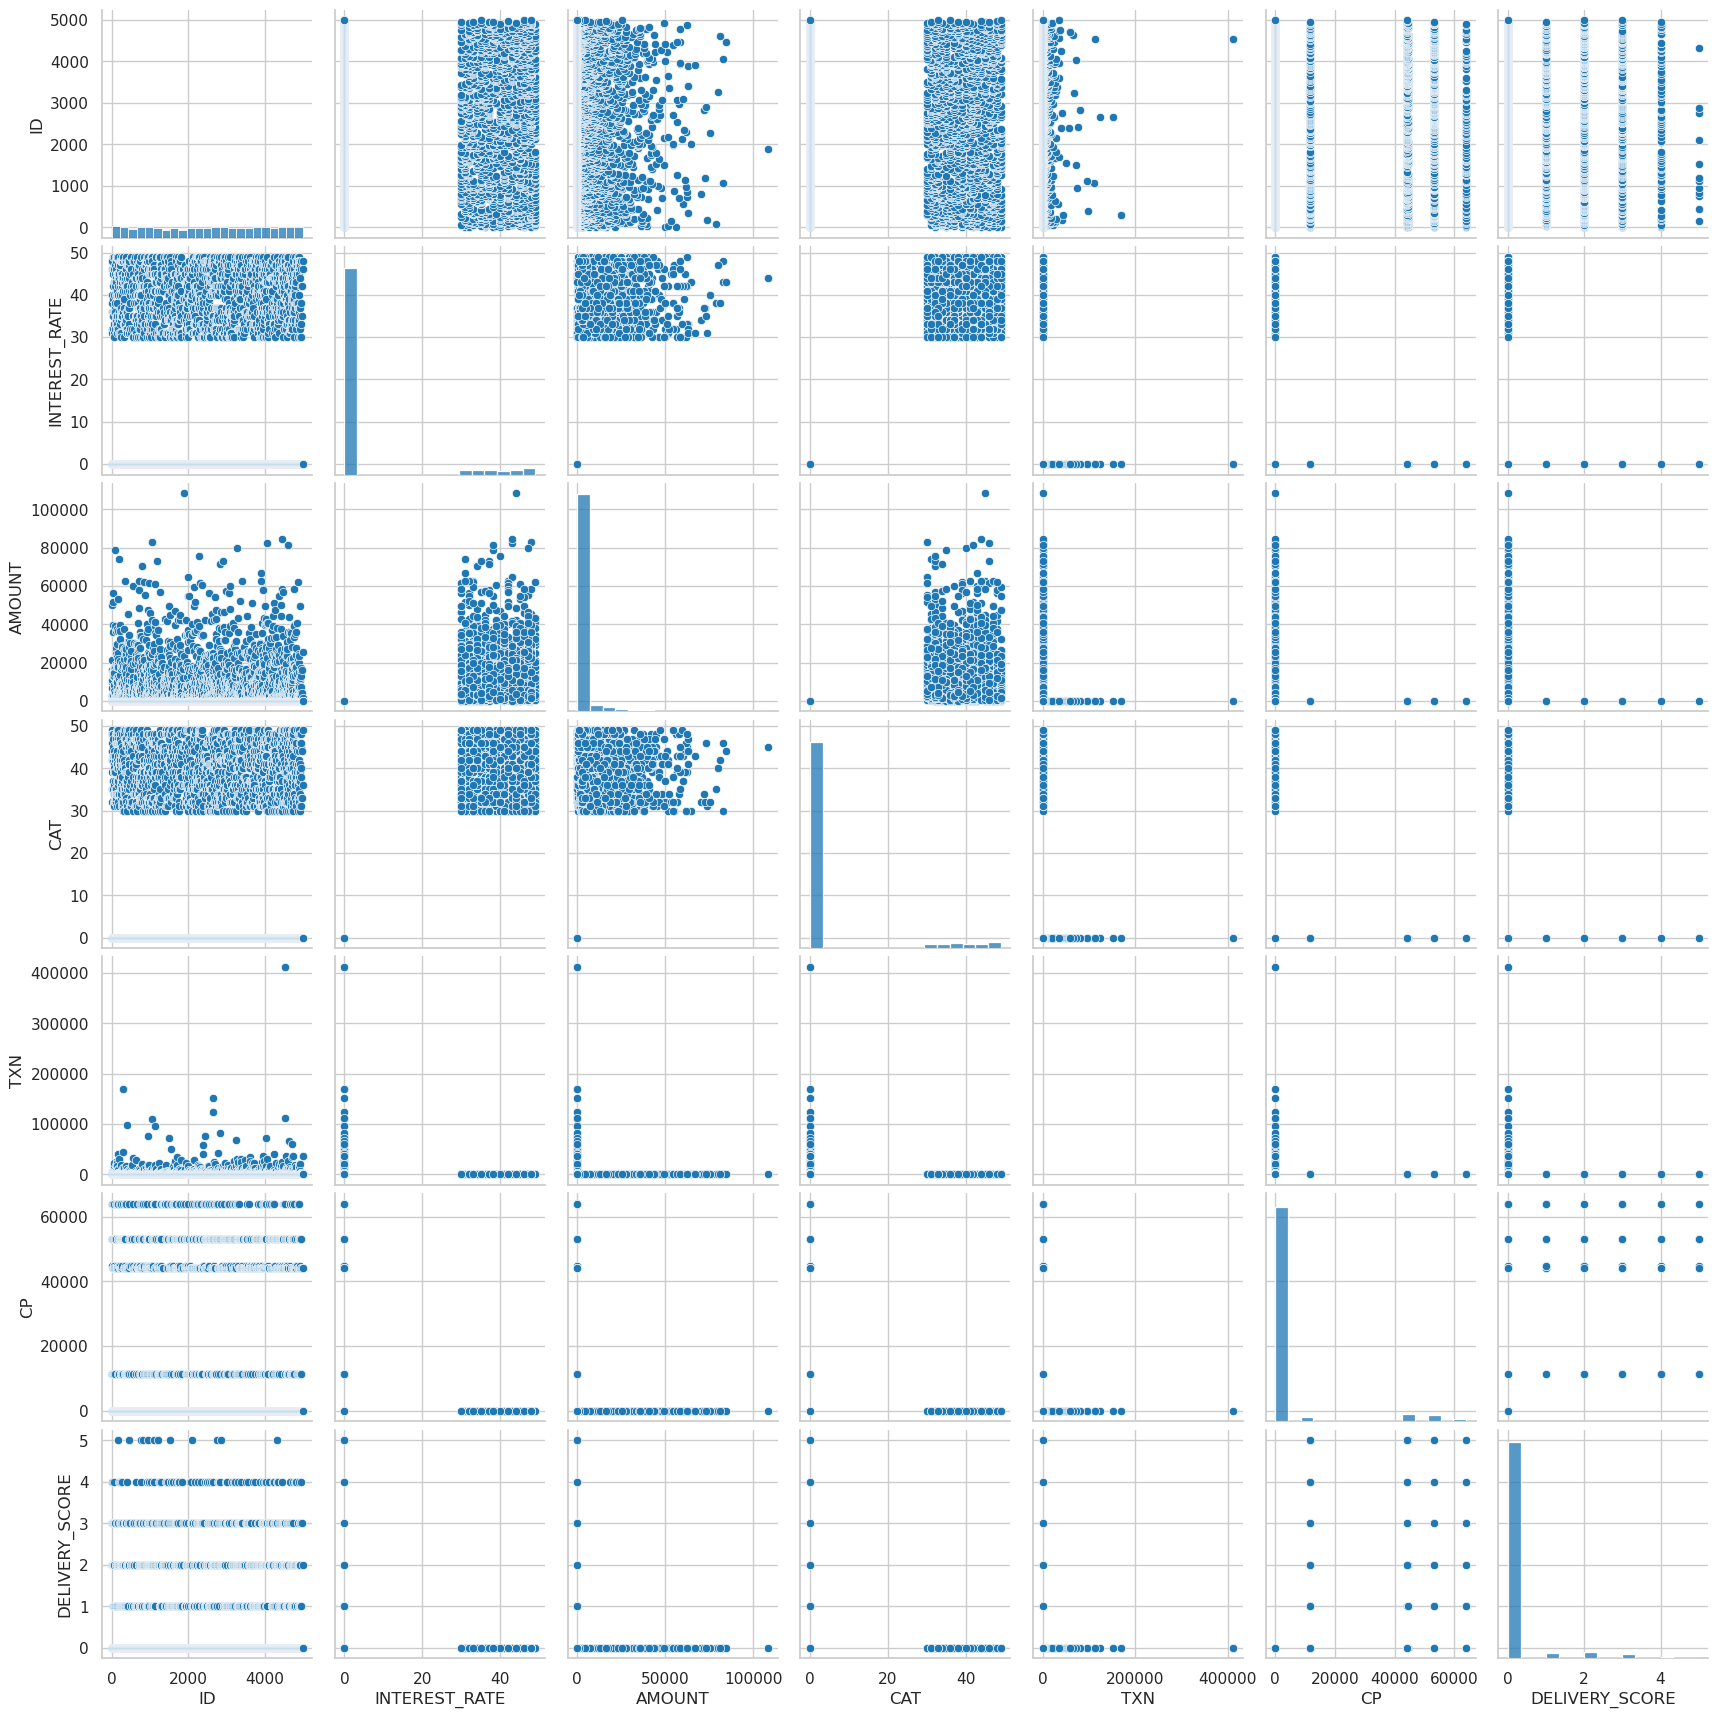

In [923]:
sns.pairplot(
    data= df

)

In [911]:
df.corr()

,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
ID,1.000000,-0.008108,-0.007245,-0.009953,0.007820,-0.000492,-0.006410
INTEREST_RATE,-0.008108,1.000000,0.671958,0.976279,-0.038805,-0.099771,-0.092854
AMOUNT,-0.007245,0.671958,1.000000,0.672044,-0.026863,-0.069068,-0.064279
CAT,-0.009953,0.976279,0.672044,1.000000,-0.038832,-0.099840,-0.092918
TXN,0.007820,-0.038805,-0.026863,-0.038832,1.000000,-0.029674,-0.027616
CP,-0.000492,-0.099771,-0.069068,-0.099840,-0.029674,1.000000,0.799991
DELIVERY_SCORE,-0.006410,-0.092854,-0.064279,-0.092918,-0.027616,0.799991,1.000000
